In [1]:
!pip install ../dist/rekomenda-0.1.0-py3-none-any.whl --quiet

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from collections import Counter

from rekomenda.coo import COOMatrix
from rekomenda.csr import CSRMatrix
from rekomenda.csc import CSCMatrix
from rekomenda.als import ALSMetrics, BiasOnlyALS, LatentFactorALS, OptimizedLatentFactorALS
from rekomenda.utils import load_data

In [3]:
train, test  = load_data(filepath='../ml-latest-small/ratings.csv', split_ratio=0.8)

In [4]:
train_csr, test_csr = CSRMatrix.from_coo(train), CSRMatrix.from_coo(test)

In [5]:
train_csc, test_csc = CSCMatrix.from_coo(train), CSCMatrix.from_coo(test)

In [13]:
train_als = LatentFactorALS(lambda_reg=0.1, n_factors=2,gamma_reg=0.1, tau_reg=0.02)

In [14]:
train_als.fit(csr_matrix=train_csr, csc_matrix=train_csc,n_iterations=20)

Iteration 1/20 - RMSE: 0.7295, NLL: 2342.1142
Iteration 2/20 - RMSE: 0.7009, NLL: 2180.0162
Iteration 3/20 - RMSE: 0.6918, NLL: 2130.0321
Iteration 4/20 - RMSE: 0.6866, NLL: 2100.9733
Iteration 5/20 - RMSE: 0.6830, NLL: 2080.3771
Iteration 6/20 - RMSE: 0.6803, NLL: 2064.8532
Iteration 7/20 - RMSE: 0.6783, NLL: 2052.8979
Iteration 8/20 - RMSE: 0.6766, NLL: 2042.9317
Iteration 9/20 - RMSE: 0.6752, NLL: 2034.3442
Iteration 10/20 - RMSE: 0.6739, NLL: 2026.4772
Iteration 11/20 - RMSE: 0.6727, NLL: 2018.9080
Iteration 12/20 - RMSE: 0.6715, NLL: 2011.4542
Iteration 13/20 - RMSE: 0.6704, NLL: 2004.2145
Iteration 14/20 - RMSE: 0.6693, NLL: 1997.4490
Iteration 15/20 - RMSE: 0.6682, NLL: 1990.5979
Iteration 16/20 - RMSE: 0.6673, NLL: 1984.8244
Iteration 17/20 - RMSE: 0.6665, NLL: 1979.6689
Iteration 18/20 - RMSE: 0.6658, NLL: 1974.8971
Iteration 19/20 - RMSE: 0.6651, NLL: 1970.3170
Iteration 20/20 - RMSE: 0.6645, NLL: 1965.8408


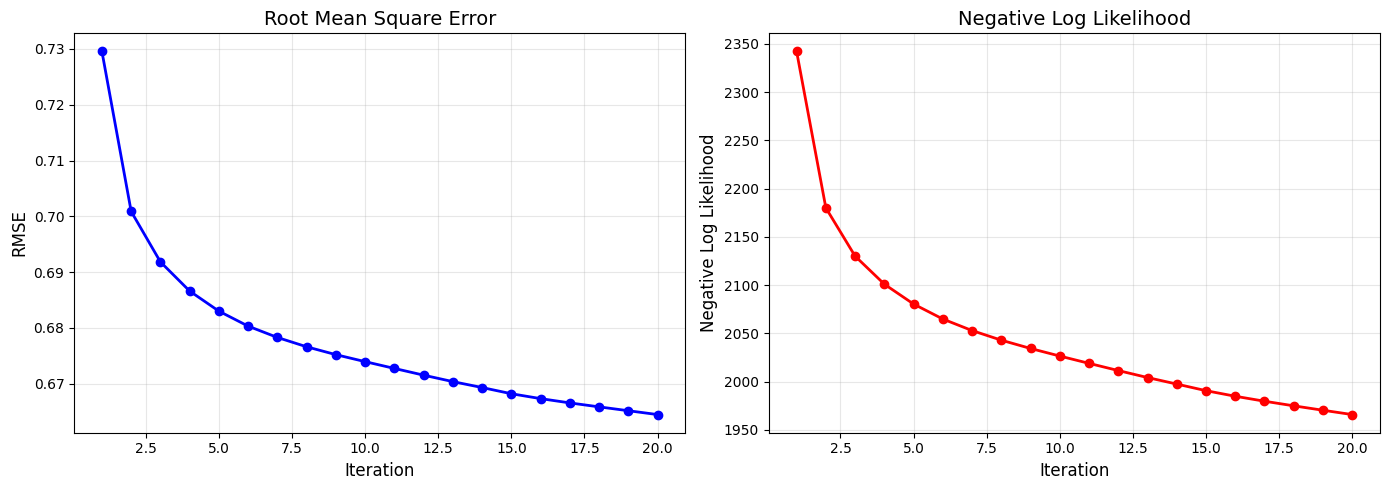

In [29]:
train_als.plot_metrics(output='pics/als-bias-with-latent-train-100k.pdf')

In [33]:
test_als = LatentFactorALS(lambda_reg=0.05, n_factors=2)

In [34]:
test_als.fit(csr_matrix=test_csr, csc_matrix=test_csc,n_iterations=20)

Iteration 1/20 - RMSE: 0.5761, NLL: 985.6186
Iteration 2/20 - RMSE: 0.5328, NLL: 943.9109
Iteration 3/20 - RMSE: 0.5135, NLL: 928.0377
Iteration 4/20 - RMSE: 0.5024, NLL: 920.7871
Iteration 5/20 - RMSE: 0.4954, NLL: 918.1348
Iteration 6/20 - RMSE: 0.4909, NLL: 915.1855
Iteration 7/20 - RMSE: 0.4875, NLL: 912.2641
Iteration 8/20 - RMSE: 0.4846, NLL: 909.8325
Iteration 9/20 - RMSE: 0.4821, NLL: 908.1833
Iteration 10/20 - RMSE: 0.4799, NLL: 906.5893
Iteration 11/20 - RMSE: 0.4780, NLL: 905.1190
Iteration 12/20 - RMSE: 0.4764, NLL: 903.6010
Iteration 13/20 - RMSE: 0.4749, NLL: 901.9934
Iteration 14/20 - RMSE: 0.4736, NLL: 900.3814
Iteration 15/20 - RMSE: 0.4725, NLL: 898.8923
Iteration 16/20 - RMSE: 0.4715, NLL: 897.6943
Iteration 17/20 - RMSE: 0.4706, NLL: 896.8748
Iteration 18/20 - RMSE: 0.4697, NLL: 896.1312
Iteration 19/20 - RMSE: 0.4689, NLL: 895.5825
Iteration 20/20 - RMSE: 0.4682, NLL: 895.0679


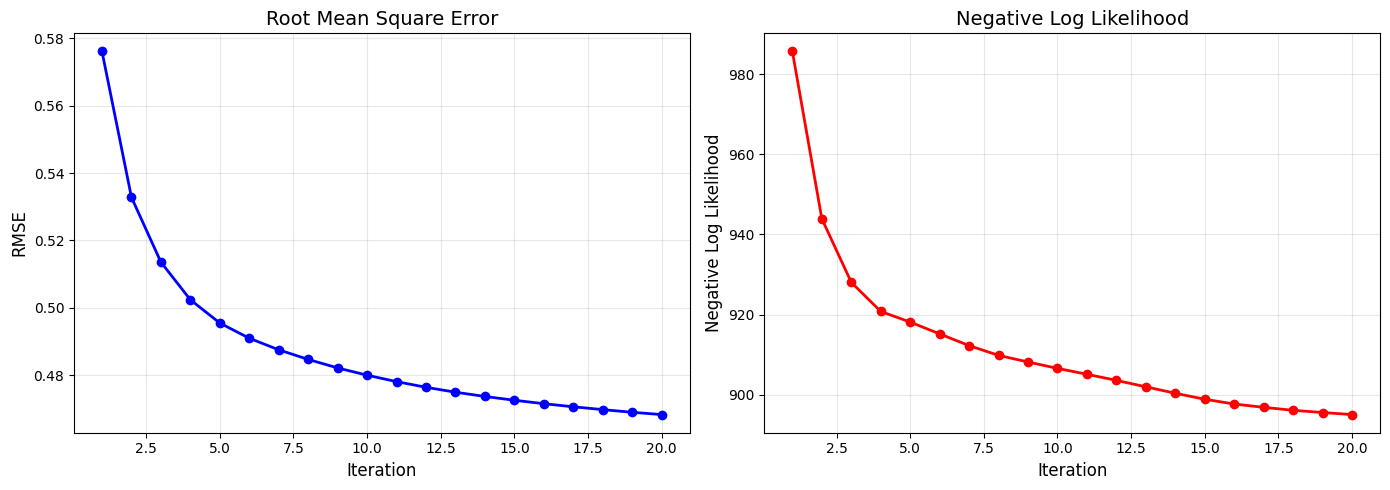

In [35]:
test_als.plot_metrics(output='pics/als-bias-with-latent-test.pdf')